In [9]:
import numpy as np
import scipy as sp
import scipy.io as sio
import matplotlib.pyplot as plt

In [4]:

## Wave period, initially just test for one period

T = np.array([
    4.24,
    4.95,
    5.66,
    6.36,
    7.07,
    7.78,
    8.49,
    9.19,
    9.55,
    9.90,
    10.30,
    10.60,
    11.30,
    12.00,
    12.70,
    13.40,
    14.10,
    15.60,
    17.00,
    18.40,
    21.20,
    25.50,
    31.10,
    36.80,
    42.40
])

## Wave exiting force (at wave amplitude 1) for the given wave period
F = np.array(
    [
        56046.8125,
        76934.7285,
        96051.515,
        114007.9815,
        131638.402,
        149441.6455,
        167436.7485,
        185264.4675,
        193953.564,
        202418.608,
        210598.472,
        218460.2035,
        233139.452,
        246372.245,
        258191.29,
        268696.4,
        278013.75,
        293628.825,
        306003.53,
        315913.535,
        330514.31,
        344361.465,
        355004.51,
        361203.255,
        365124.48,
    ]
)

## Corresponding added mass for the given wave period
a = np.array(
    [
        42596.9125,
        43226.9125,
        44068.4375,
        44900.5,
        45678.8375,
        46427.975,
        47166.025,
        47882.05,
        48222.05,
        48547.525,
        48858,
        49148.5375,
        49678.4875,
        50146.9125,
        50556.4625,
        50922.65,
        51250.7375,
        51819.1,
        52303.95,
        52731.725,
        53457.9875,
        54346.475,
        55299,
        56083.1125,
        56752.85,
    ],
)

## Corresponding Hydrodynamic damping for the given wave period
b = np.array(
    [
        5414.696938,
        6426.680946,
        6710.022235,
        6635.40741,
        6429.533594,
        6176.755365,
        5892.03195,
        5578.435971,
        5414.210689,
        5247.947607,
        5081.908153,
        4918.026313,
        4603.036372,
        4311.327214,
        4045.805829,
        3806.430019,
        3591.198384,
        3223.388817,
        2922.971759,
        2674.178076,
        2286.788872,
        1881.529145,
        1524.553823,
        1282.811533,
        1107.900985,
    ],
)


In [5]:
# sp.interpolate.interp1d(T, F, kind="cubic")
# TODO: Function to interpolate F(1 / fi) 

SyntaxError: invalid syntax (2556738553.py, line 2)

Wave exciting force for irregular waves

In [7]:
delta_f = 0.01 # note: i think you get this from identity df = 1/T (T is wave period)
N = 40 # i think this is standard number

Tz = 8.5 # average wave period, placeholder
Hs = 1.5 # significant wave height, placeholder
Tp = 1.4*Tz # peak wave period, placeholder
fp = 1/Tp # peak wave frequency, placeholder

A = (5 / 16) * (Hs ** 2) * (fp ** 4)
B = (5 / 4) * (fp ** 4)

# generate array with 40 terms of random 0 and 1
def generate_fi(N: int) -> np.array:
    """
    test1 = np.random.rand(N) / 2
    test2 = np.arange(N)
    test3 = (test1 + test2) * delta_f
    """
    return (0.5*np.random.rand(N) + np.arange(N)) * delta_f

def generate_Ti(fi: np.array) -> np.array:
    return 1 / fi

def generate_Sf(fi: np.array) -> np.array:
    return (A / (fi ** 5)) * np.exp(-B / (fi ** 4))

def generate_ai(Sf: np.array) -> np.array: # amplitudes
    return (2 * Sf * delta_f) ** 0.5

def generate_phi(N: int) -> np.array: # random phase, multiplying 2pi at the Fw(t) calculation
    return np.random.rand(N)

def fw_t(t: float, ai: np.array, fi: np.array, phi: np.array) -> float: # note that t is from the time array
    return np.sum(ai * np.sin(2*np.pi * (fi * t + phi)))

Interpolation Functions

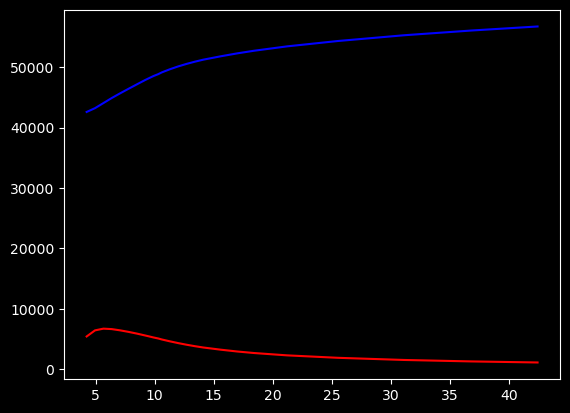

In [12]:
# T_i in the matlab code refer to specific time points, not the wave period
# TODO: What is length of T_i? (Also what is length of T_vec in the matlab code?)
F_interp = sp.interpolate.interp1d(T, F, kind="cubic")
a_interp = sp.interpolate.interp1d(T, a, kind="cubic")
b_interp = sp.interpolate.interp1d(T, b, kind="cubic")

#plt.plot(T, F_interp(T))
plt.plot(T, a_interp(T), color="blue")
plt.plot(T, b_interp(T), color="red")

In [ ]:
def couloumb_damping(Ffric: float, v1: float, v2: float) -> float: 
    """
    Coulomb damping force for nonlinear damping

    Args:
        Ffric (float): Coulomb friction force
        v1 (float): velocity of body 1
        v2 (float): velocity of body 2

    Returns:
        float: Coulomb damping force
    """
    return Ffric * np.tanh(100 * (v1 - v2))

In [6]:
def retardation(b_interp: np.array, omega_interp: np.array, t: float):

In [ ]:
sp.integrate.solve_ivp(
    func, 
    tspan=[t0, tf], 
    y0=np.array([0, 0, 0, 0]), 
    method='',
    t_eval=[],
    rtol,
    atol,
    jac_sparsity= [[]]
    )

"""
t_eval: which intermediate solutions to store. if None, solver selects points
events: (List[Callable[[],]]) events to track
vectorised: (bool) TODO: dont fully understand this
args: (tuple) addditional arguments to pass to func. if so, then jacobian and events must also have same param signature
rtol: relative tolerance
atol: absolute tolerance
jac_sparsity: sparsity structure defined, refer to AQBA.m 
"""